In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/drive/MyDrive/DataScience-Datasets/student_performance_new.csv')

In [4]:
df.head(5)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sl.No.              54 non-null     int64  
 1   USN                 54 non-null     object 
 2   STUDENT NAME        54 non-null     object 
 3   Test I              54 non-null     int64  
 4   Test II             54 non-null     int64  
 5   Test III            54 non-null     int64  
 6   Test Total          54 non-null     float64
 7   Test Result         54 non-null     int64  
 8   Quiz 1              54 non-null     float64
 9   Quiz 2              54 non-null     float64
 10  Compensatory        53 non-null     float64
 11  Quiz                54 non-null     float64
 12  Quiz Result         54 non-null     int64  
 13  Test + Quiz         54 non-null     float64
 14  Assignment          54 non-null     int64  
 15  Unnamed: 15         54 non-null     int64  
 16  Assignment

In [6]:
df.describe()

,Sl.No.,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
count,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,53.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.0,54.000000
mean,27.907407,23.740741,30.462963,18.87037,24.358025,0.462963,5.592593,5.148148,9.490566,15.481481,0.981481,39.839506,13.759259,13.666667,1.0,0.500000
std,16.156392,8.355735,9.158382,7.47334,6.489744,0.503308,1.363521,1.516045,1.011903,1.710023,0.136083,6.903495,0.698656,0.700404,0.0,0.504695
min,1.000000,6.000000,6.000000,5.00000,12.666667,0.000000,2.500000,2.000000,7.000000,10.500000,0.000000,27.000000,13.000000,12.000000,1.0,0.000000
25%,14.250000,17.000000,25.500000,14.25000,18.916667,0.000000,5.000000,4.000000,10.000000,15.000000,1.000000,35.041667,13.000000,13.000000,1.0,0.000000
50%,27.500000,25.000000,32.000000,18.00000,24.000000,0.000000,5.500000,5.000000,10.000000,15.500000,1.000000,38.500000,14.000000,14.000000,1.0,0.500000
75%,41.750000,29.750000,37.750000,22.00000,28.500000,1.000000,6.875000,6.000000,10.000000,16.500000,1.000000,45.375000,14.000000,14.000000,1.0,1.000000
max,55.000000,46.000000,45.000000,43.00000,41.000000,1.000000,8.000000,10.000000,10.000000,20.000000,1.000000,60.000000,15.000000,15.000000,1.0,1.000000


In [7]:
df.shape

(54, 18)

In [10]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [11]:
df.dropna(subset=['Compensatory'],inplace=True)

In [12]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          0
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [13]:
df.head(3)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1


In [14]:
x=df.drop(['Sl.No.','USN','STUDENT NAME','Result'],axis=1)
y=df['Result']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
dtl=DecisionTreeClassifier(random_state=42)
dtl.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

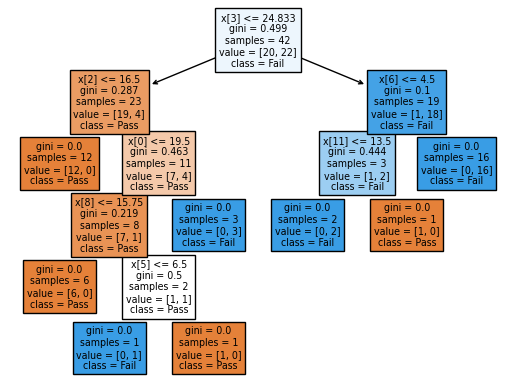

In [18]:
plt=plot_tree(dtl,class_names=['Pass','Fail'],filled=True)

In [19]:
ypred=dtl.predict(xtest)

In [21]:
accuracy=accuracy_score(ytest,ypred)
print('Accuracy: %.2f'%accuracy)

Accuracy: 0.82


In [23]:
classificationReport=classification_report(ytest,ypred)
classification_report

<function classification_report at 0x7ce683d6f250>


In [26]:
confusionMatrix=confusion_matrix(ytest,ypred)

<Axes: >

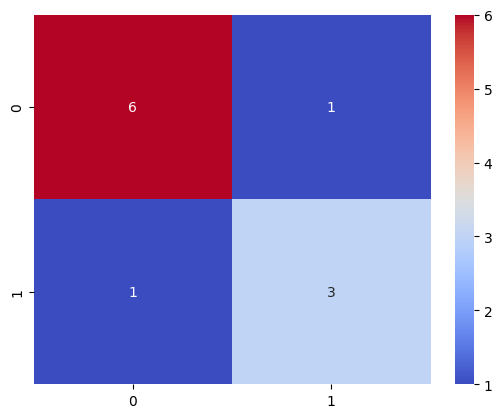

In [30]:
sns.heatmap(confusionMatrix,annot=True,cmap='coolwarm')

In [32]:
test_data=dtl.predict([[5,10,15,20,25,30,35,40,45,50,55,60,65,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
if test_data[0]==1:
  print('Pass')
else:
  print('Fail')

Fail


In [34]:
test_data=dtl.predict([[35,50,55,60,65,30,25,40,45,50,55,60,65,70]])
if test_data[0]==1:
  print('Pass')
else:
  print('Fail')

Pass


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
